In [3]:
import os 
print(os.getcwd())
os.environ.update(os.environ)
        # Add a new environment variable to the operating system
os.environ["RAMP_HOME"] = "/home/kshitij/hotosm/fAIr-lib-python"
# Print the environment variables to verify that the new variable was added
print(os.environ["RAMP_HOME"])

/home/kshitij/hotosm/fAIr-lib-python
/home/kshitij/hotosm/fAIr-lib-python


In [4]:
import ramp.utils
import fairlib
base_path = "/home/kshitij/hotosm/fAIr-lib-python/ramp-data/sample_2"

In [ ]:
from fairlib import preprocess
model_input_image_path = f"{base_path}/image_input"
preprocess_output=f"/{base_path}/preprocessed"
preprocess(
            input_path = model_input_image_path,
            output_path = preprocess_output,
            rasterize=True,
            rasterize_options=["binary"],
            georeference_images=True,
        )

In [6]:
from fairlib import train

Writing /home/kshitij/hotosm/fAIr-lib-python/ramp-data/sample_2/train/fair_split_train.csv
Writing /home/kshitij/hotosm/fAIr-lib-python/ramp-data/sample_2/train/fair_split_val.csv


Starting to prepare data for training
Data is ready for training
Metric constructor function: get_sparse_categorical_accuracy_fn
Model: importing saved model /home/kshitij/hotosm/fAIr-lib-python/ramp-code/ramp/checkpoint.tf
Starting Training with 2 epochs , 2 batch size , 62 steps per epoch , 11 validation steps......
Epoch 1/2
62/62 [==============================] - ETA: 0s - loss: 0.7531 - sparse_categorical_accuracy: 0.8088

INFO:tensorflow:Assets written to: /home/kshitij/hotosm/fAIr-lib-python/ramp-data/sample_2/train/model-checkpts/20221212-183819/model_20221212-183819_001_0.803.tf/assets


INFO:tensorflow:Assets written to: /home/kshitij/hotosm/fAIr-lib-python/ramp-data/sample_2/train/model-checkpts/20221212-183819/model_20221212-183819_001_0.803.tf/assets


62/62 [==============================] - 106s 2s/step - loss: 0.7531 - sparse_categorical_accuracy: 0.8088 - val_loss: 0.6061 - val_sparse_categorical_accuracy: 0.8031
Epoch 2/2
62/62 [==============================] - ETA: 0s - loss: 0.4104 - sparse_categorical_accuracy: 0.8492

INFO:tensorflow:Assets written to: /home/kshitij/hotosm/fAIr-lib-python/ramp-data/sample_2/train/model-checkpts/20221212-183819/model_20221212-183819_002_0.893.tf/assets


INFO:tensorflow:Assets written to: /home/kshitij/hotosm/fAIr-lib-python/ramp-data/sample_2/train/model-checkpts/20221212-183819/model_20221212-183819_002_0.893.tf/assets


62/62 [==============================] - 102s 2s/step - loss: 0.4104 - sparse_categorical_accuracy: 0.8492 - val_loss: 0.4541 - val_sparse_categorical_accuracy: 0.8934
Training Finished , Time taken to train : 208.0741161549995 seconds
Generating graphs ....
Graph generated at : /home/kshitij/hotosm/fAIr-lib-python/ramp-data/sample_2/train/graphs
extracting highest accuracy model
/home/kshitij/hotosm/fAIr-lib-python/ramp-data/sample_2/train/model-checkpts/20221212-183819
model_20221212-183819_002_0.893.tf


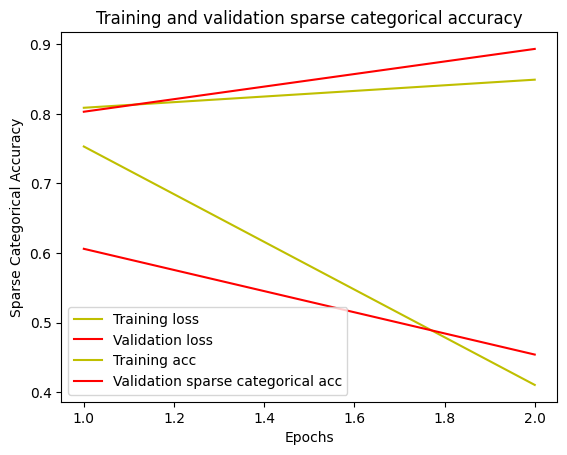

In [7]:
train_output = f"{base_path}/train"
final_accuracy, final_model_path = train(
    input_path=preprocess_output,
    output_path=train_output,
    epoch_size=2,
    batch_size=2,
    model="ramp",
    model_home=os.environ["RAMP_HOME"],
)

In [8]:
print(final_accuracy,final_model_path)

89.3 /home/kshitij/hotosm/fAIr-lib-python/ramp-data/sample_2/train/model-checkpts/20221212-183819/model_20221212-183819_002_0.893.tf


In [9]:
from fairlib import predict
prediction_output = f"{base_path}/prediction/output"
predict(
    checkpoint_path=final_model_path,
    input_path=f"{base_path}/prediction/input",
    prediction_path=prediction_output,
)

1/1 [==============================] - 1s 1s/step


Georeferencing for output: 100%|██████████████████████████████████████████████| 2/2 [00:00<00:00, 59.06it/s]


In [10]:
from fairlib import polygonize
geojson_output= f"{prediction_output}/prediction.geojson"
polygonize(
    input_path=prediction_output, 
    output_path=geojson_output,
    remove_inputs = True,
)

100%|███████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 47.26mask/s]
/home/kshitij/anaconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
ERROR:fiona._env:PROJ: proj_create_from_database: /home/kshitij/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
Merging components: 100%|████████████████████████████████████████████| 59/59 [00:04<00:00, 14.34component/s]
/home/kshitij/anaconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
